# Оценка рынка заведений общественного питания Москвы

## Описание проекта

Для открытия небольшого оригинального кафе в Москве, в котором гостей будут обслуживать роботы, необходимы дополнительные инвестиции. Наш проект многообещающий, но достаточно дорогой. В данном отчете будет описывться текущее положение дел на рынке заведений общественного питания в Москве с вероятными прогнозами популярности нашего проекта на долгосрок.

В моем распоряжении - открытые данные о заведениях общественного питания в Москве.

## Загрузка данных из файла и подготовка их к анализу

### Загрузка библиотек

Мой основной инструмент — `pandas`. Я подключаю эту библиотеку. Также подключаю библиотеки, `seaborn`, `re`, `numpy` и `matplotlib` - они понадобятся для моих исследований.

Дополнительно отключу предупреждения (библиотека `warnings`).

In [1]:
import pandas as pd                # импорт библиотеки pandas
import seaborn as sns              # импорт библиотеки seaborn
import re                          # импорт библиотеки регулярных выражений re
import numpy as np                 # импорт библиотеки numpy
from numpy import median
import matplotlib.pyplot as plt    # импорт библиотеки matplotlib
from io import BytesIO
import requests

import warnings as wg              # импорт библиотеки warnings

wg.filterwarnings('ignore')

### Загрузка и описание данных

Осуществляю чтение файла данных о заведениях общественного питания Москвы `rest_data.csv` из папки `/datasets` и сохраняю его в переменной `data`. Вывожу на экран первые пять строк таблицы.

In [2]:
try:
    data = pd.read_csv('/Users/a4128/Documents/My_projects/07_Rest/rest_data.csv') # локальный путь
except:
    data = pd.read_csv('/datasets/rest_data.csv') # серверный путь
display(data.head(5))
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Согласно документации к данным таблица содержит следующую информацию об объектах:

- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

### Проверка данных на дубликаты и пропуски в данных

Для исключения вероятности появления дубликатов в столбце `object_name`, переведу все названия в нижний регистр, а также не буду включать в выборку столбец `id` для более корректного поиска, удалю дубликаты.

In [3]:
# Посмотрю количество уникальных названий в исходных данных
print('Количество уникальных названий -', data['object_name'].nunique())
print()

data['object_name'] = data['object_name'].str.lower() 

print('Количество явных дубликатов в таблице:') 
print('data -', data.duplicated(subset=data.columns.difference(['id'])).sum())

# удаление дубликатов с обновлением индексов
data = data.drop_duplicates(subset=data.columns.difference(['id'])).reset_index(drop = True) 
print()
print('Количество явных дубликатов в таблице после удаления:') 
print('data -', data.duplicated(subset=data.columns.difference(['id'])).sum())

Количество уникальных названий - 10393

Количество явных дубликатов в таблице:
data - 85

Количество явных дубликатов в таблице после удаления:
data - 0


Проведу лемматизацию для проверки:

In [4]:
from pymystem3 import Mystem       # импорт модуля pymystem3
from collections import Counter    # импорт модуля collections
m = Mystem()
data_lemmas = m.lemmatize(' '.join(data['object_name']))
display(Counter(data_lemmas).most_common()) # подсчет упоминаний в датафрейме и сортировка

[(' ', 27782),
 (' «', 2402),
 ('» ', 2386),
 ('кафе', 1826),
 ('столовая', 1567),
 ('-', 962),
 ('школа', 929),
 ('№', 883),
 ('.', 729),
 ('ресторан', 608),
 ('при', 600),
 ('гбоу', 468),
 ('бар', 458),
 ('пицца', 382),
 ('шаурма', 350),
 ('буфет', 318),
 ('суша', 271),
 ('кофе', 257),
 ('пекарня', 252),
 ('и', 212),
 ('бургер', 203),
 ('с', 198),
 ('kfc', 190),
 ('шоколадница', 189),
 ('шк', 174),
 ('1', 172),
 ('макдоналдс', 172),
 ('кинг', 168),
 ('сош', 161),
 (', ', 142),
 ('в', 133),
 ("'", 129),
 (') ', 128),
 ('кофейня', 128),
 (' (', 127),
 ('донер', 126),
 ('на', 123),
 ('питание', 118),
 ('кухня', 118),
 ('теремок', 116),
 ('выпечка', 116),
 ('колледж', 113),
 ('bar', 109),
 ('кальянный', 107),
 ('хаус', 106),
 ('хинкальный', 104),
 ('чайхон', 101),
 ('картошка', 101),
 ('wok', 100),
 ('домино', 100),
 ('крошка', 99),
 ('. ', 98),
 ('lounge', 98),
 ('пиццерия', 96),
 ('кебаб', 94),
 ('гоу', 89),
 ('coffee', 88),
 ('милти', 83),
 ('клуб', 78),
 ('гриль', 77),
 ('папа', 77),

По полученным данным можно заметить, что часто в названии заведений встречаются категории самого заведения, а именно, `кафе`, `столовая`, `кофейня`, `бар`, `пекарня`, `кафетерий`, `паб`, что может повлиять на количество неявных дубликатов. Создам дополнительный столбец, в который занесу измененные названия заведений (еще дополнительно отключу кавычки) и снова проверю снова данные на дубликаты.

In [5]:
data['object_name'] = data['object_name'].str.replace('кафе |ресторан быстрого питания| столовая |кофейня |бар |кафетерий |пекарня |паб |предприятие быстрого обслуживания |закусочная |«|»', '')
#data = data.reindex(columns=['id', 'object_name', 'chain', 'object_type', 'address'])
print('Количество явных дубликатов в таблице:') 
print('data -', data.duplicated(subset=data.columns.difference(['id'])).sum())
data = data.drop_duplicates(subset=data.columns.difference(['id'])).reset_index(drop = True) 
print()
print('Количество явных дубликатов в таблице после удаления:') 
print('data -', data.duplicated(subset=data.columns.difference(['id'])).sum())

Количество явных дубликатов в таблице:
data - 0

Количество явных дубликатов в таблице после удаления:
data - 0


Проверю, не встречается ли в данных иное написание основных сетевых ресторанов, а именно, `mcdonalds`, `burger king`, `starbucks`, `subway`, `kfc`, `мята lounge`. 

In [6]:
print('Проверка mcdonalds:')
print(data[data['object_name'].str.contains('макд|makd|macd|mkd|mcd')]['object_name'].unique())
print()
print('Проверка kfc:')
print(data[data['object_name'].str.contains('kfc')]['object_name'].unique())
print()
print('Проверка burger king:')
print(data[data['object_name'].str.contains('кинг|king')]['object_name'].unique())
print()
print('Проверка starbucks:')
print(data[data['object_name'].str.contains('starb|старб')]['object_name'].unique())
print()
print('Проверка subway:')
print(data[data['object_name'].str.contains('subw|сабв')]['object_name'].unique())
print()
print('Проверка мята lounge:')
print(data[data['object_name'].str.contains('мята lounge')]['object_name'].unique())

Проверка mcdonalds:
['макдоналдс' 'ресторан макдоналдс' 'москва - макдоналдс'
 'ресторанмакдоналдс' 'mcdonalds']

Проверка kfc:
['kfc' 'ростикс kfc' 'kfc волгоградский' 'пбо kfc покрышкина' 'kfc.'
 'ресторан kfc' 'пбо kfc' 'fridays kfc' ' kfc']

Проверка burger king:
['английский букингем' 'ресторан бургер кинг' 'бургер кинг' 'би-би-кинг'
 'донер кинг' 'бургер кинг burger king' 'ресторан kings' 'im smoking'
 'кафе-бургер кинг' 'кебабкинг' 'two smocking barrels pub' 'лаки кинг'
 'вьет кинг' 'шаурма кинг' 'burgerking' 'бурген кинг' 'kingberry']

Проверка starbucks:
['старбакс starbucks' 'starbucks' 'старбакс' 'сабвей старбакс'
 'старбакс кофе' 'starbucks кофе' 'starbucks, старбакс кофе'
 'starbucks старбакс' 'старбагс' 'starbucks coffee' 'кофемания starbucks']

Проверка subway:
['сабвей' 'subway' 'сабвей сушивок' 'сабвэй' 'сабвей subway'
 'сабвей старбакс']

Проверка мята lounge:
['мята lounge' 'мята lounge кальянный клуб' 'кальянная мята lounge'
 'кальян-мята lounge' 'кальян- мята loung

In [7]:
# Замена найденных наименований
data['object_name'] = data['object_name'].str.replace('ресторан макдоналдс|москва - макдоналдс|ресторанмакдоналдс|макдоналдс', 'mcdonalds')
data['object_name'] = data['object_name'].str.replace('ресторан бургер кинг|бургер кинг burger king|кафе-бургер кинг|burgerking|бургер кинг', 'burger king')
data['object_name'] = data['object_name'].str.replace('старбакс starbucks|старбакс|старбакс кофе|starbucks кофе|starbucks, старбакс кофе|starbucks старбакс|старбагс|starbucks coffee|кофемания starbucks', 'starbucks')
data['object_name'] = data['object_name'].str.replace('сабвей|сабвэй|сабвей subway', 'subway')
data['object_name'] = data['object_name'].str.replace('ростикс kfc|kfc волгоградский|пбо kfc покрышкина|kfc.|ресторан kfc|пбо kfc| kfc', 'kfc')
data['object_name'] = data['object_name'].str.replace('мята lounge кальянный клуб|кальянная мята lounge|кальян-мята lounge|кальян- мята lounge|мята lounge шаболовка|мята lounge автозаводская|лаундж-мята lounge|мята lounge октябрьская', 'мята lounge')

In [8]:
# Посмотрю количество уникальных названий
print('Количество уникальных названий -', data['object_name'].nunique())

Количество уникальных названий - 9430


In [9]:
print('Количество пропущенных значений в датафреймах:')
print('data -', data.isna().sum().sort_values(ascending=False))

Количество пропущенных значений в датафреймах:
data - id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


### Проверка корректности данных

Проверю данные в колонке принадлежности ресторана к сети `chain`.

In [11]:
data['chain'].value_counts()

нет    12317
да      2964
Name: chain, dtype: int64

Здесь все корректно, никаких лишних наименований.

Проверю данные в колонке сетевой/несетевой.

In [12]:
chain_yes = (data
             .query('chain == "да"')
             .pivot_table(index='object_name', values='id', aggfunc = 'nunique')
             .sort_values(by='id')
            )
chain_yes_1 = chain_yes.query('id == 1')
display(chain_yes)
print('Количество сетевых заведений -', len(chain_yes))
print('Из них', round(len(chain_yes_1) / len(chain_yes) * 100), '% от общего количества сетевых заведений')

,id
object_name,
крошка картошка,1
пироги штолле,1
пиппони,1
пикколо,1
песто и митлес,1
...,...
теремок,107
burger king,159
mcdonalds,172


Количество сетевых заведений - 445
Из них 53 % от общего количества сетевых заведений


Более половины `сетевых` заведений имеют только один объект. Возможно, они имеют филиалы где-то за пределами Москвы, но скорее всего - это проблемы различного написания одних и тех же заведений питания. Поэтому я принимаю решение не заменять значение `сетевой` на `несетевой` для тех заведений, где количество ресторанов равно одному.

Проверю данные о количестве мест в ресторанах:

count    15281.0
mean        60.0
std         75.0
min          0.0
25%         14.0
50%         40.0
75%         80.0
max       1700.0
Name: number, dtype: float64


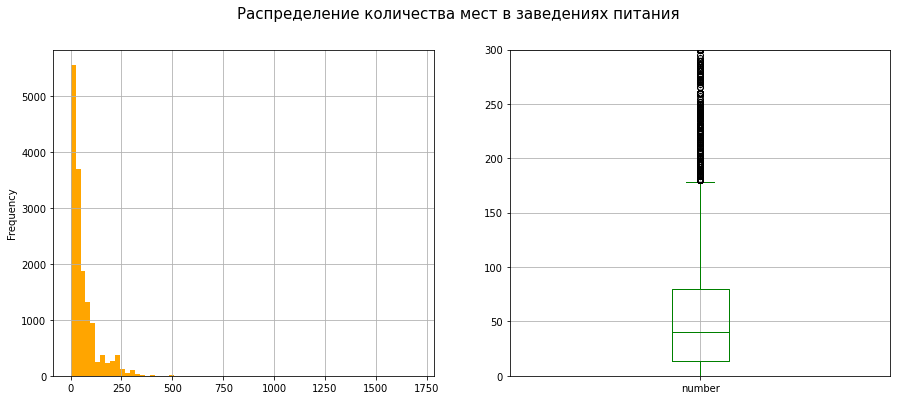

In [13]:
print(round(data['number'].describe()))

fig, axes = plt.subplots(1,2,figsize=(15,6))
data['number'].plot(kind='hist', bins=70, grid=True, ax=axes[0], color='orange')
data.boxplot(('number'), ax=axes[1], color='green')
plt.ylim(0, 300)
plt.suptitle('Распределение количества мест в заведениях питания', fontsize=15)
plt.show();

По полученной информации:

- количество посадочных мест в ресторанах колеблется от 0 до 1700;
- ориентировочная верхняя граница нормального размаха около 180 посадочных мест. Всё, что лежит за ней буду считать аномальными значениями. Более высокие значения рисуются отдельными точками и сливаются в единую жирную линию: значит таких выбросов достаточно много. И всё же значения, которые отсёк верхний «ус» диаграммы размаха — редкие. Видно, насколько медиана (около 40 посадочных мест) не стремится к длинному хвосту высоких значений.

In [14]:
print('Количество ресторанов с отсутствием посадочных мест -', (data[data['number'] == 0]['number'].count()))

Количество ресторанов с отсутствием посадочных мест - 1588


### Выводы по разделу

Получены данные о заведениях общественного питания в Москве, отображены и предварительно пранализированы.

Согласно документации к данным, таблица содержит следующую информацию:

- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

В результате предварительного анализа выявлено:

- в данных отсутствуют пропущенные значения;
- в таблице отсутствует нарушение стиля названий столбцов;
- типы данных соответствуют логике;
- в столбце, содержащем название заведения, присутствуют дубликаты, разными способвами написаны одни и те же названия;
- данные в столбце, содержащие количестов посадочных мест, содержит аномальные значения, ориентировочная верхняя граница нормального размаха около 180 посадочных мест.

По результатам проведенной предобработки данных:

- уникальных названий заведений уменьшилось на 986 (с исходных 10393 до 9407) - это поможет избежать дальнейших ошибок при анализе данных:
- выявлено нормальное значение посадочных мест в ресторанах Москвы - это от 14 до 80 мест. Верхнее критическое значение - 180 посадочных мест. Все, что больше - аномально высокие значения.
- выявлено 1588 заведений, в которых нет посадочных мест
- обнаружено 235 из 445 сетевых заведений, имеющих только 1 ресторан на территории Москвы - это более половины.

## Анализ данных

### Соотношение вида объекта по количеству

object_type
магазин (отдел кулинарии)             273
закусочная                            348
кафетерий                             395
буфет                                 576
бар                                   855
предприятие быстрого обслуживания    1897
ресторан                             2282
столовая                             2584
кафе                                 6071
Name: id, dtype: int64

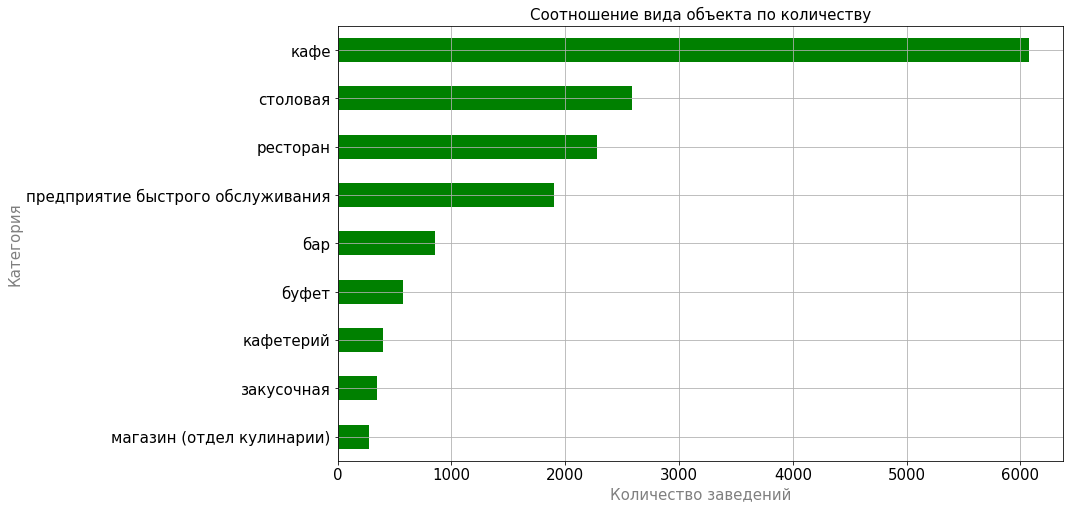

In [15]:
report = (data
    .groupby('object_type')['id'].count()
    .sort_values()
         )
display(report)
(
report.plot(kind='barh',
            figsize=(13,8),
            grid=True,
            fontsize=15,
            color='green')
            )
plt.title('Соотношение вида объекта по количеству', fontsize=15)
plt.xlabel('Количество заведений', fontsize=15, color='grey')
plt.ylabel('Категория', fontsize=15, color='grey')
plt.show();

,category,%
0,бар,5.60
1,другие,10.42
2,кафе,39.73
3,предприятие быстрого обслуживания,12.41
4,ресторан,14.93
5,столовая,16.91


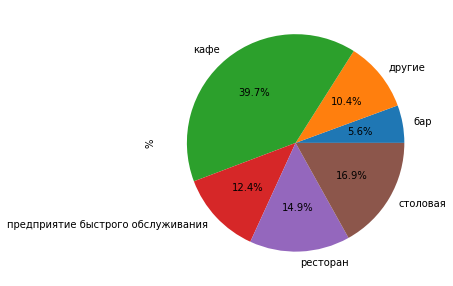

In [16]:
report = report.reset_index()
report['%'] = round(report['id'] / report['id'].sum() * 100, 2)
report.drop(['id'], axis=1, inplace=True)

# определение категории в соответствии с этажом
def categorize(report):
    if report['%'] >= 5:
        return report['object_type']
    return 'другие' 

report['category'] = report.apply(categorize, axis = 1)
report = report.groupby('category')['%'].sum().reset_index()
display(report)


(
report
    .plot
    .pie(y='%',
         figsize=(5,5),
         labels=report['category'],
         legend=False,
         autopct='%1.1f%%')
);


**Наиболее популярными заведениями в Москве являются кафешки (почти 40% от всех заведений общественного питания), второе место по популярности занимают столовки (с почти 17%), далее рестораны и предприятия быстрого обслуживания (15% и 13% соотвественно).**

### Соотношение сетевых и несетевых заведений по количеству

chain,да,нет,all
object_type,,,
магазин (отдел кулинарии),78,195,273
закусочная,56,292,348
кафетерий,52,343,395
буфет,11,565,576
бар,37,818,855
предприятие быстрого обслуживания,788,1109,1897
ресторан,543,1739,2282
столовая,3,2581,2584
кафе,1396,4675,6071


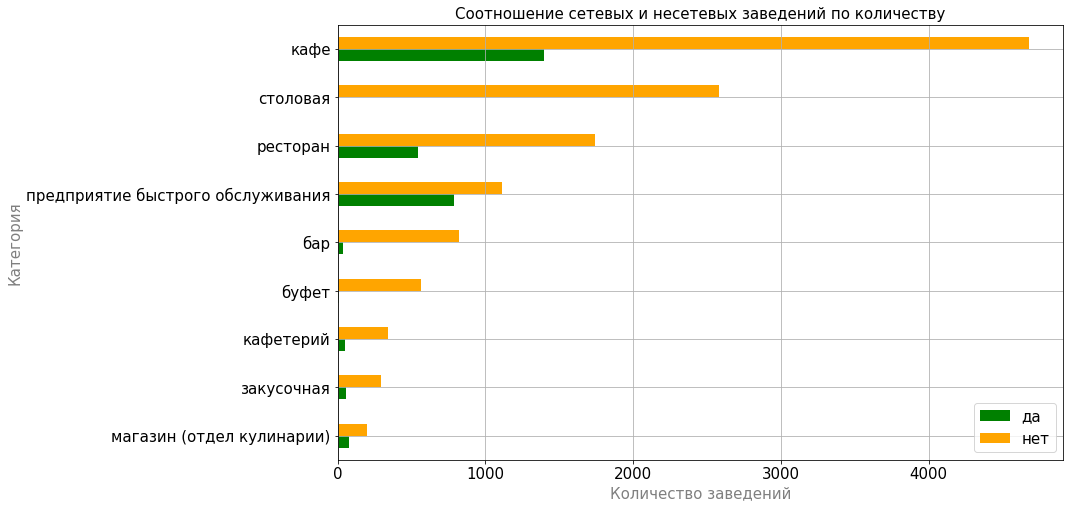

In [17]:
result = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc = 'count')
result['all'] = result['да'] + result['нет']
result = result.sort_values(by='all')
display(result)
(
result[['да', 'нет']]
    .plot(kind='barh',
          figsize=(13,8),
          grid=True,
          fontsize=15,
          color=['green', 'orange'])
)
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=15)
plt.xlabel('Количество заведений', fontsize=15, color='grey')
plt.ylabel('Категория', fontsize=15, color='grey')
plt.legend(prop={'size': 15});

**Можно заметить, что большее распространение получают несетевые заведения общественного питания.**

### Виды заведений, для которых характерно сетевое распространение

chain,да,нет,all,%
object_type,,,,
предприятие быстрого обслуживания,788,1109,1897,41
магазин (отдел кулинарии),78,195,273,28
ресторан,543,1739,2282,23
кафе,1396,4675,6071,22
закусочная,56,292,348,16
кафетерий,52,343,395,13
бар,37,818,855,4
буфет,11,565,576,1
столовая,3,2581,2584,0


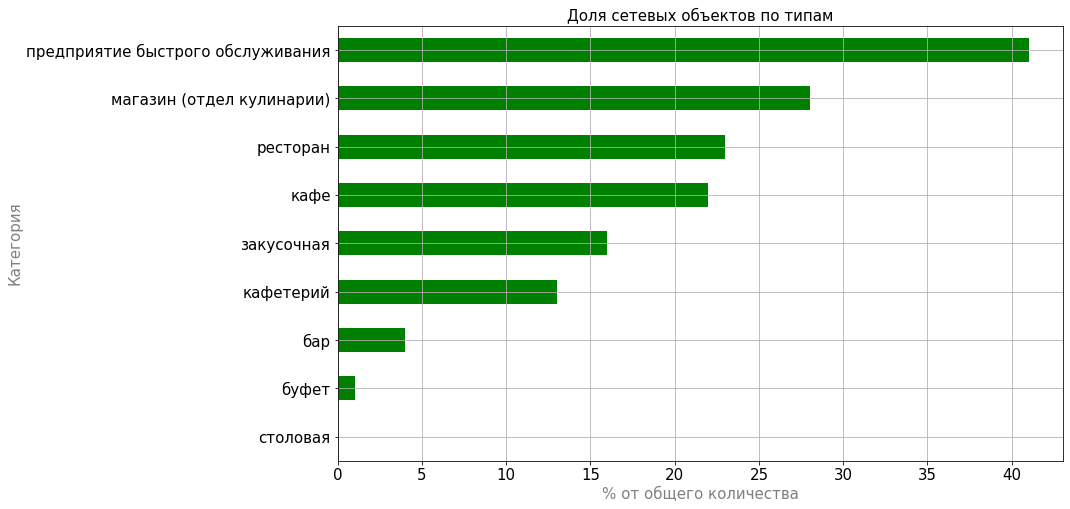

In [18]:
result['%'] = (result['да'] / result['all'] * 100).astype('int')
display(result.sort_values(by='%', ascending=False))
(
result['%']
    .sort_values()
    .plot(kind='barh',
          figsize=(13,8),
          grid=True,
          fontsize=15,
          color = 'green')
)
plt.title('Доля сетевых объектов по типам', fontsize=15)
plt.xlabel('% от общего количества', fontsize=15, color='grey')
plt.ylabel('Категория', fontsize=15, color='grey')
plt.show();

**Сетевое распространение в основном характерно в большей степени для предприятий быстрого обслуживания (более 40% от всех предприятий быстрого обслуживания свляются сетевыми), отделов кулинарии (28%), рестораны и кафе (23% и 22% соответственно). Столовки, буфеты и бары редко бываю сетевыми.**

### Что характерно для сетевых заведений

Для определения границ категорий - `небольшое` количество мест, `большое` количество мест, `много` заведений, `мало` заведений, необходимо найти среднее значение количества мест и количества объектов для каждой сети и посчитать среднее значение.

In [19]:
chain_yes = (data
             .query('chain == "да"')
             .groupby('object_name')
             .agg({'id': 'count', 'number': 'median'})
             .sort_values(by='number', ascending=False)
             .astype('int')
            )
chain_yes[['id', 'number']].describe().astype('int')

,id,number
count,445,445
mean,6,59
std,20,54
min,1,0
25%,1,20
50%,1,45
75%,4,90
max,187,306


Слишком высоко среднеквадратическое отклонение, чтобы определять границы по среднему, рассчитаю медиану, чтобы минимизировать влияние выбросов.

In [20]:
chain_yes['id'].median()

1.0

Это произошло, потому что половина всех сетевых ресторанов имеет всего 1 объект. Необходимо все-таки изменить для сетевых ресторанов, которые имеют всего 1 объект значение `сетевой` на `несетевой` для корректного расчета.

In [21]:
chain_yes_unique = chain_yes_1.index.unique()
data.loc[data['object_name'].isin(chain_yes_unique), 'chain'] = 'нет'

chain_yes = (data
             .query('chain == "да"')
             .groupby('object_name')
             .agg({'id': 'count', 'number': 'median'})
             .sort_values(by='number', ascending=False)
             .astype('int')
            )
print('Много заведений - больше', chain_yes['id'].median().astype('int'))
print('Много мест - больше', chain_yes['number'].median().astype('int'))

Много заведений - больше 4
Много мест - больше 43


Итак, выбраны границы. Теперь необходимо посчитать, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [22]:
# Проведу категоризацию
chain_yes['objects'] = 'Много объектов'
chain_yes.loc[chain_yes['id'] <= 4, 'objects'] = 'Мало объектов'

chain_yes['seats'] = 'Много мест'
chain_yes.loc[chain_yes['number'] <= 43, 'seats'] = 'Мало мест'

chain_yes['group'] = chain_yes['objects'].astype('str') + '/' + chain_yes['seats'].astype('str')
chain_yes.head()

,id,number,objects,seats,group
object_name,,,,,
пилзнер,2,245,Мало объектов,Много мест,Мало объектов/Много мест
бакинский бульвар,3,240,Мало объектов,Много мест,Мало объектов/Много мест
старина мюллер старина миллер,2,215,Мало объектов,Много мест,Мало объектов/Много мест
ресторан урюк,3,200,Мало объектов,Много мест,Мало объектов/Много мест
темпл бар,3,200,Мало объектов,Много мест,Мало объектов/Много мест


Посчитаю количество в полученных группах и сравню количество.

,кол-во сетей,среднее кол-во объектов,среднее кол-во мест
group,,,
Мало объектов/Много мест,62,2.5,91.5
Много объектов/Мало мест,54,9.5,17.5
Мало объектов/Мало мест,52,2.0,20.0
Много объектов/Много мест,42,9.5,75.5


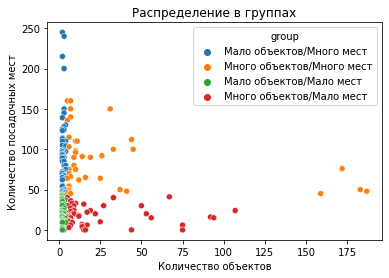

In [23]:
sns.scatterplot(data=chain_yes, 
                x='id', 
                y='number',
                hue='group')
plt.title('Распределение в группах')
plt.xlabel('Количество объектов')
plt.ylabel('Количество посадочных мест')
#plt.figure(figsize=(20, 10));
(
chain_yes
    .reset_index()
    .groupby('group')
    .agg({'object_name': 'nunique', 
          'id': 'median', 
          'number': 'median'})
    .sort_values(by='object_name', ascending=False)
    .rename(columns = {'object_name': 'кол-во сетей',
                       'id': 'среднее кол-во объектов',
                       'number': 'среднее кол-во мест'})
)


**По полученному графику и соответствующей ей таблице можно увидеть четкую закономерность распределения в полученных группах - наиболее характерным для сетевых заведений на территории Москвы является небольшое количество заведений общественного питания с большим количеством посадочных мест в каждом.**

### Среднее количество посадочных мест

Рассчитаю для каждого вида объекта общественного питания среднее количество посадочных мест. Визуализирую результат.

object_type
магазин (отдел кулинарии)              5.589744
закусочная                             7.847701
кафетерий                              9.184810
предприятие быстрого обслуживания     20.808645
кафе                                  39.785703
бар                                   43.533333
буфет                                 51.425347
ресторан                              96.884750
столовая                             130.337848
Name: number, dtype: float64

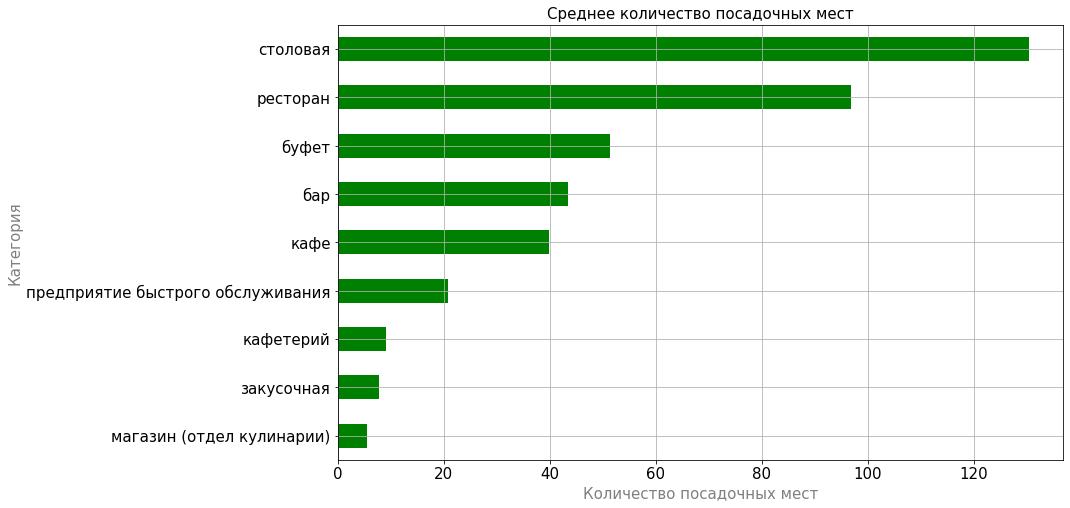

In [24]:
places_mean = (data
               .groupby('object_type')['number'].mean()
               .sort_values()
              )
display(places_mean)
(places_mean
    .plot(kind='barh',
          figsize=(13,8),
          grid=True,
          fontsize=15,
          color = 'green')
)
plt.title('Среднее количество посадочных мест', fontsize=15)
plt.xlabel('Количество посадочных мест', fontsize=15, color='grey')
plt.ylabel('Категория', fontsize=15, color='grey')
plt.show();

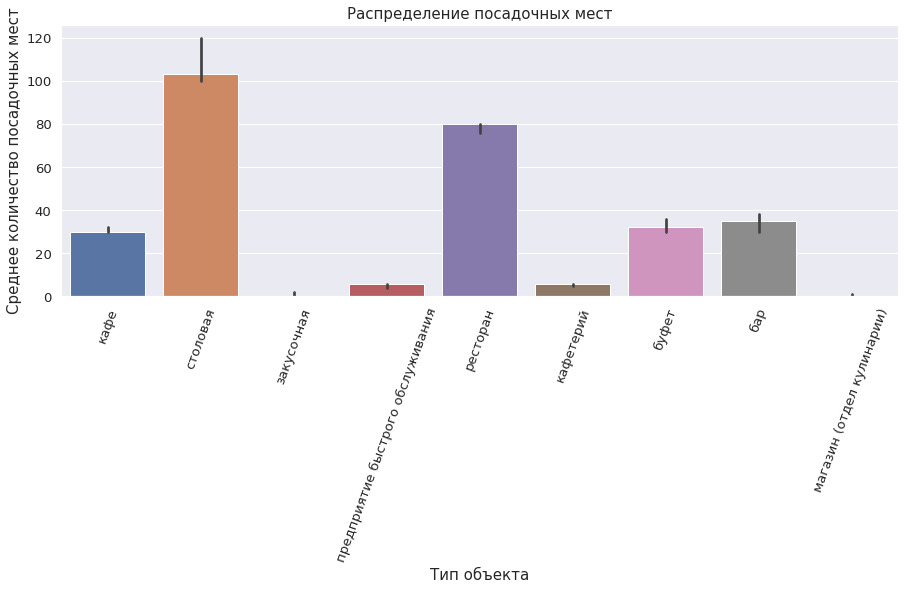

In [25]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.2)
sns.barplot(data=data,
            x='object_type',
            y='number',
            estimator=median
           )
plt.title('Распределение посадочных мест', fontsize=15)
plt.xlabel('Тип объекта', fontsize=15)
plt.ylabel('Среднее количество посадочных мест', fontsize=15)
plt.xticks(rotation=70);

**Максимальное количество посадочных мест в заведениях Москвы сосредоточено в столовых и ресторанах. А минимальное количество - в магазинах (оделах кулинарии, закусочных и кафетериях).**

### Выделение информации об улице

Напишу функцию, осуществляющую поиск части адреса, в котором содержится название улицы:

In [26]:
def street(cell):
    # разбиваю адрес на части и проверяю, содержится ли улица
    for element in cell.split(','):
        for type in ['улица', 'шоссе', 'бульвар', 'переулок', 'проезд', 'проспект',]:
            if type in element: return element
    # если не найдено - второй элемент
    return cell.split(',')[1]

data['streetname'] = data['address'].apply(street)
data['streetname'] = data['streetname'].str.strip() # удаление ненужных пробелов с конца строки
data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания

,id
streetname,
Каширское шоссе,111
Кутузовский проспект,114
проспект Вернадского,128
Ленинский проспект,148
Варшавское шоссе,165
Пресненская набережная,167
Ленинградский проспект,172
город Зеленоград,175
Профсоюзная улица,182


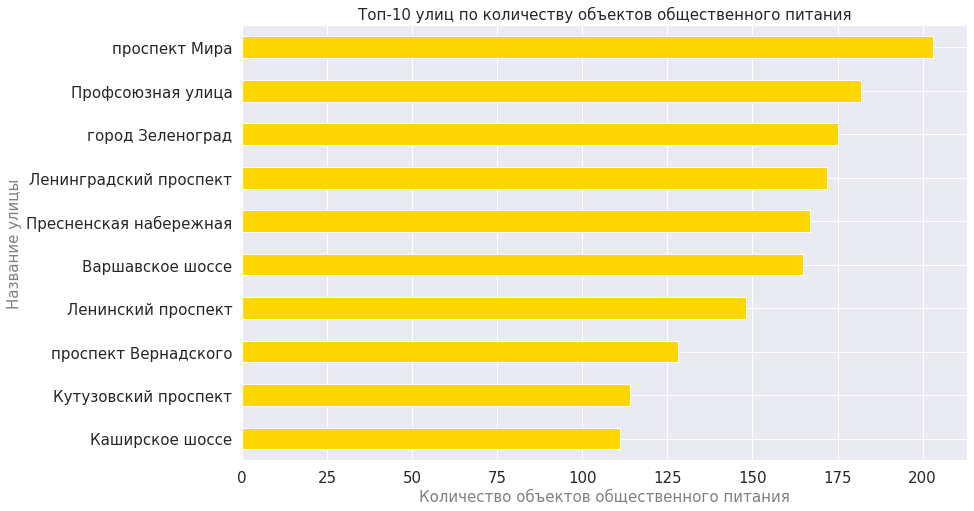

In [27]:
streets_10 = (data
              .pivot_table(index='streetname', 
                           values='id', 
                           aggfunc='count')
              .sort_values(by='id')
              .tail(10)
             )
display(streets_10)
(
streets_10
    .plot(kind='barh',
          figsize=(13,8),
          grid=True,
          fontsize=15,
          color='gold',
          legend=False)
)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=15)
plt.xlabel('Количество объектов общественного питания', fontsize=15, color='grey')
plt.ylabel('Название улицы', fontsize=15, color='grey')
plt.show();

На третьем месте расположен город Зеленоград, я не буду исключать эту информацию, т.к. город Зеленоград считается Москвой.

**Самое большое количество объектов питания расположено на `Проспекте мира` - 203 заведения, далее идёт Профсоюзная улица с 182 объектами и город Зеленоград (175 объектов общественного питания).**

Определю список районов Москвы, на которых расположено самое большое количество объектов общественного питания. Для этого воспользуюсь встраиванием стороннего файла с данными.

### Встраивание файла с названиями районов

Буду использовать данные с google.docs
`https://docs.google.com/spreadsheets/u/0/d/1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs/htmlview#gid=2139935940`. Там содержится информация о всех улицах Москвы и их принадлежности к определенному району.

In [28]:
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
areas = pd.read_csv(BytesIO(r.content))
areas['streetname'] = areas['streetname'].str.strip() # удаление ненужных пробелов
areas.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Дополню основной датасет информацией о принадлежности улицы району из полученной таблицы, предварительно удалив возможные лишние пробелы на концах срок:

In [29]:
streets_10 = streets_10.reset_index()

In [30]:
streets_10['streetname'] = streets_10['streetname'].str.strip()
streets_10

,streetname,id
0,Каширское шоссе,111
1,Кутузовский проспект,114
2,проспект Вернадского,128
3,Ленинский проспект,148
4,Варшавское шоссе,165
5,Пресненская набережная,167
6,Ленинградский проспект,172
7,город Зеленоград,175
8,Профсоюзная улица,182
9,проспект Мира,203


In [46]:
streets_10_areas = streets_10.merge(areas, on=['streetname'], how='left')
streets_10_areas.groupby('streetname').agg({'area': 'unique'})

,area
streetname,
Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Са..."
Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
Ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский ра..."
Ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Н..."
Пресненская набережная,[Пресненский район]
Профсоюзная улица,"[Академический район, Район Черемушки, Район Я..."
город Зеленоград,"[Район Крюково, Район Матушкино-Савелки, Панфи..."
проспект Вернадского,"[Район Проспект Вернадского, Район Раменки, Ра..."


In [32]:
# Проверка объединения таблиц
if streets_10_areas['area'].isna().sum() == 0:
    print('Объединение прошло успешно, данные не потеряны')
else:
    print('При объединении таблиц потеряно', streets_10_areas['area'].isna().sum(), 'наименований')

print()
print('Районы Москвы с самым большим количеством заведений общественного питания:')
streets_10_areas['area'].unique()

Объединение прошло успешно, данные не потеряны

Районы Москвы с самым большим количеством заведений общественного питания:


array(['Район Москворечье-Сабурово', 'Район Нагатино-Садовники',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Донской район', 'Обручевский район',
       'Район Теплый Стан', 'Район Якиманка',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Нагорный район', 'Район Северное Бутово',
       'Район Южное Бутово', 'Пресненский район', 'Район Аэропорт',
       'Район Беговой', 'Хорошевский район', 'Район Сокол',
       'Район Крюково', 'Район Матушкино-Савелки', 'Панфиловский район',
       'Академический район', 'Район Черемушки', 'Район Ясенево',
       'Район Коньково', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский ра

### Улицы с одним объектом общественного питания

In [33]:
data_areas = data.merge(areas, on=['streetname'], how='left')
data_areas.head()

,id,object_name,chain,object_type,address,number,streetname,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,18.0,ЦАО,Таганский район


Проверю, ко всем ли адресам присоединились районы:

In [34]:
# Проверка объединения таблиц
if data_areas['area'].isna().sum() == 0:
    print('Объединение прошло успешно, данные не потеряны')
else:
    print('При объединении таблиц потеряно', data_areas['area'].isna().sum(), 'наименований')

При объединении таблиц потеряно 633 наименований


Проверю, что это за пропуски.

In [35]:
(
data_areas[data_areas['area'].isnull()]
    .groupby('streetname')['id']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

,streetname,id
0,Калужское шоссе,53
1,улица Мичуринский Проспект,37
2,территория Ленинские Горы,27
3,улица Хабарова,23
4,улица Александры Монаховой,23
5,улица Липовый Парк,22
6,поселение Сосенское,21
7,город Московский,19
8,поселение Московский,19
9,город Троицк,16


Проверю, почему не произошло совмещения. Проверю, есть ли не найденные улицы в дополнительной таблице, и по возможности скорректирую.

In [36]:
street_part = ['алужск', 
               'ичуринский', 
               'енинские', 
               'абарова', 
               'онаховой', 
               'иповый', 
               'осенское', 
               'осковский', 
               'роицк', 
               'оскресенское', 
               'льянина',
               'язановское',
               'аповское',
               'имферопольское']

def find_streets(data):
    for element in data:
        print(areas[areas['streetname'].str.contains(element)]['streetname'].unique())
        #print()
        
find_streets(street_part)

['Малая Калужская улица' 'Малый Калужский переулок' 'Старокалужское шоссе'
 'Калужская площадь']
['Мичуринский проспект' 'улица Мичуринский Проспект, Олимпийская Деревня']
['Ленинские Горы']
[]
[]
[]
[]
['Московский проспект']
['Троицкая улица' '1-й Троицкий переулок' '2-й Троицкий переулок']
[]
[]
[]
[]
[]


Из полученных реультатов можно увидеть, что исправить представляется возможным только 2 улицы - это `Мичуринский проспект` и `Ленинские горы`. Проведу корректировку и повторное объединение таблиц.

In [37]:
data['streetname'] = data['streetname'].str.replace('улица Мичуринский Проспект', 'Мичуринский проспект')
data['streetname'] = data['streetname'].str.replace('территория Ленинские Горы', 'Ленинские Горы')
data_areas = data.merge(areas, on=['streetname'], how='left')
print('Количество пропущенных значений в столбце area:', data_areas['area'].isna().sum())
print('Доля пропущенных значений составляет ', round(data_areas['area'].isna().sum() / len(data_areas) * 100, 2), '%.')

Количество пропущенных значений в столбце area: 569
Доля пропущенных значений составляет  1.87 %.


In [38]:
data_areas[data_areas['area'].isnull()]['streetname'].unique()

array(['3-й Митинский переулок', 'улица Руднёвка',
       'проспект Защитников Москвы', 'поселение Вороновское',
       'улица Лётчика Ульянина', 'улица Рассудовское Лесничество',
       'Юбилейная улица', 'поселение Внуковское', 'Армейская улица',
       'поселение Десеновское', 'город Троицк', 'поселение Московский',
       'Октябрьский проспект', '2-я Барышевская улица',
       'улица Мостотреста', 'поселение Щаповское',
       'поселение Краснопахорское', 'поселение Воскресенское',
       'город Московский', 'улица Липовый Парк', 'улица Сосенский Стан',
       'улица Садовый Квартал', 'улица Александры Монаховой',
       'поселение Роговское', 'поселение Филимонковское',
       'поселение Новофедоровское', 'улица 1-й километр Объездной Дороги',
       'проезд № 4922', 'улица Заморёнова', 'улица Константина Царёва',
       '3-я Подрезковская улица', 'Пыжёвский переулок',
       'улица Героев-Панфиловцев', 'Новохорошёвский проезд',
       'Воробьёвское шоссе', 'проспект Генерала Алек

Для исключения части ошибок необходимо обработать МКАД. Проверю, каким образом он отображается в дополнительной таблице и проведу замену.

In [39]:
print(areas[areas['streetname'].str.contains('МКАД')]['streetname'].unique())

['МКАД, 100-й километр' 'МКАД, 101-й километр' 'МКАД, 102-й километр'
 'МКАД, 103-й километр' 'МКАД, 104-й километр' 'МКАД, 6-й километр'
 'МКАД, 7-й километр' 'МКАД, 95-й километр' 'МКАД, 96-й километр'
 'МКАД, 97-й километр' 'МКАД, 98-й километр' 'МКАД, 99-й километр'
 'МКАД, 4-й километр' 'МКАД, 5-й километр' 'МКАД, 105-й километр'
 'МКАД, 106-й километр' 'МКАД, 1-й километр' 'МКАД, 2-й километр'
 'МКАД, 3-й километр' 'МКАД, 107-й километр' 'МКАД, 108-й километр'
 'МКАД, 109-й километр' 'МКАД, 60-й километр' 'МКАД, 57-й километр'
 'МКАД, 58-й километр' 'МКАД, 59-й километр' 'МКАД, 53-й километр'
 'МКАД, 54-й километр' 'МКАД, 55-й километр' 'МКАД, 56-й километр'
 'МКАД, 48-й километр' 'МКАД, 49-й километр' 'МКАД, 50-й километр'
 'МКАД, 51-й километр' 'МКАД, 52-й километр' 'МКАД, 47-й километр'
 'МКАД, 45-й километр' 'МКАД, 46-й километр' 'МКАД, 79-й километр'
 'МКАД, 80-й километр' 'МКАД, 81-й километр' 'МКАД, 77-й километр'
 'МКАД, 75-й километр' 'МКАД, 76-й километр' 'МКАД, 78-й ки

Ясно, нужно произвести замену по шаблону: `56-й километр Московской Кольцевой Автодороги` -> `МКАД, 56-й километр` и снова произвести объединение таблиц.

In [40]:
# разбиваю улицу на части
data['buffer'] = data['streetname'].str.split(' ')
# провожу замену
fltr = data['streetname'].str.contains('Кольцевой') 
data.loc[fltr, 'streetname'] = 'МКАД, ' + data.loc[fltr, 'buffer'].apply(lambda x: x[0] + ' ' + x[1])
# проверка результата
data.loc[fltr]['streetname'].head()

5215    МКАД, 87-й километр
5274    МКАД, 82-й километр
5275    МКАД, 82-й километр
5316    МКАД, 87-й километр
5317    МКАД, 87-й километр
Name: streetname, dtype: object

In [41]:
data_areas = data.merge(areas, on=['streetname'], how='left')
data_areas

print('Количество пропущенных значений в столбце area:', data_areas['area'].isna().sum())
print('Доля пропущенных значений составляет ', round(data_areas['area'].isna().sum() / len(data_areas) * 100, 2), '%.')

Количество пропущенных значений в столбце area: 535
Доля пропущенных значений составляет  1.76 %.


In [42]:
streets_1 = (data
              .pivot_table(index='streetname', 
                           values='id', 
                           aggfunc='count')
              .query('id == 1')
            )
#streets_1.head(60)
print('Всего улиц с одним объектом общественного питания -', len(streets_1))

Всего улиц с одним объектом общественного питания - 574


In [43]:
streets_1_areas = streets_1.merge(areas, on=['streetname'], how='left')
print('Районы Москвы с улицами, на которых всего 1 объект общественного питания:')
streets_1_areas['area'].unique()

Районы Москвы с улицами, на которых всего 1 объект общественного питания:


array(['Район Аэропорт', 'Басманный район', 'Красносельский район',
       'Район Свиблово', 'Рязанский район', 'Район Якиманка', nan,
       'Район Хамовники', 'Район Соколиная Гора', 'Даниловский район',
       'Мещанский район', 'Таганский район', 'Район Лефортово',
       'Район Печатники', 'Район Сокольники', 'Район Замоскворечье',
       'Хорошевский район', 'Район Арбат', 'Алексеевский район',
       'Район Текстильщики', 'Район Ростокино', 'Район Раменки',
       'Район Хорошево-Мневники', 'Район Покровское-Стрешнево',
       'Район Марьина роща', 'Район Богородское', 'Нижегородский район',
       'Тверской район', 'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', 'Район Измайлово',
       'Район Северное Измайлово', 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Филевский Парк',
       'Район Перово', 'Район Чертаново Южное', 'Южнопортовый Район',
 

### Распределение количества посадочных мест для улиц с большим количеством объектов

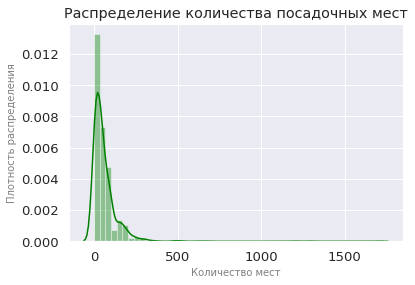

In [44]:
numbers = (data
           .groupby('streetname')['number']
           .count()
           .reset_index()
           .sort_values(by='number')
           .tail(10)
          )
top_10 = numbers['streetname']
streets_numbers = data.query('streetname in @top_10')

snsplot = sns.distplot(streets_numbers['number'], color='green')
#plt.xlim(0, 300)
#plt.ylim(0, 0.015)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест', fontsize=10, color='grey')
plt.ylabel('Плотность распределения', fontsize=10, color='grey')
plt.show();

**Для улиц с большим количеством объектов общественного питания наиболее характерным является небольшое количество мест в заведениях общественного питания, однако на графике можно уведить небольшой всплеск, показывающий, что также популярны и такие объекты, в которых мест примерно от 150 до 200.**

## Общий вывод

Проведена работа по оценке рынка заведений общественного питания Москвы.

Наиболее популярными заведениями в Москве являются кафешки (почти 40% от всех заведений общественного питания), поэтому можно сделать вывод, что кафешки - довольно популярный тип заведения и выбор именно кафе, а тем более такого оригинального, где посетителей будут обслуживать роботы, был сделан верно. 

Исходя из того, что в Москве большее распространение получают несетевые заведения общественного питания, то сначала открывать целесообразно только одну кафешку. И далее, если получится завоевать аудиторию и можно будет увидеть, что спрос посетителей становится все больше, то переводить заведение в разряд сетевых, открывать новые точки.

Для открытия первой кафешки было бы целесообразно открываться  в месте, где большая проходимость (в этих районах сосредоточено больше всего объектов общественного питания) - это районы:

       'Москворечье-Сабурово', 'Район Нагатино-Садовники',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Донской район', 'Обручевский район',
       'Район Теплый Стан', 'Район Якиманка',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Нагорный район', 'Район Северное Бутово',
       'Район Южное Бутово', 'Пресненский район', 'Район Аэропорт',
       'Район Беговой', 'Хорошевский район', 'Район Сокол',
       'Район Крюково', 'Район Матушкино-Савелки', 'Панфиловский район',
       'Академический район', 'Район Черемушки', 'Район Ясенево',
       'Район Коньково', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район'

Идеальным вариантом было бы открыть первый ресторан на 40 посадочных мест (среднее количество посадочных мест в кафешках Москвы) на одной из улиц, где сосредоточено самое большое количество объектов общественного питания в Москве, потому что именно там самая большая проходимость и есть понимание, что голодным точно не уйдешь, а тем более, что привычные кафе могут надоесть, а при проведении хорошей рекламной кампании можно добиться отличной посещаемости. Эти улицы:

        Каширское шоссе
        Кутузовский проспект
        Проспект Вернадского
        Ленинский проспект
        Варшавское шоссе
        Пресненская набережная
        Ленинградский проспект
        город Зеленоград
        Профсоюзная улица
        Проспект Мира

В принципе, при хорошем раскладе и успехе первого открытого кафе, можно начинать развиваться, открыть еще несколько точек, тем самым перевести предприятие в разряд сетевых. Сетевое распространение в основном характерно в большей степени для предприятий быстрого обслуживания (более 40% от всех предприятий быстрого обслуживания являются сетевыми), однако 22% кафе также являются сетевыми, поэтому это нормальная практика. 
Наиболее характерным для сетевых заведений на территории Москвы является небольшое количество заведений общественного питания с большим количеством посадочных мест в каждом. Поэтому целесообразнее будет открывать несколько ресторанов с большим количеством мест.

При успехе первой точки и хорошей рекламе, пользователи уже будут узнавать бренд и поэтому логичнее будет открыть новые кафе с большим количеством посадочных мест (от 60 и больше) в районах, где заведений питания мало. Т.к. уже не нужно будет завоевывть популярность, а люди просто будут приходить с определенной целью - поесть и посмотреть на роботов-официантов. Эти районы:
       
       Район Аэропорт', 'Басманный район', 'Красносельский район',
       'Район Свиблово', 'Рязанский район', 'Район Якиманка', nan,
       'Район Хамовники', 'Район Соколиная Гора', 'Даниловский район',
       'Мещанский район', 'Таганский район', 'Район Лефортово',
       'Район Печатники', 'Район Сокольники', 'Район Замоскворечье',
       'Хорошевский район', 'Район Арбат', 'Алексеевский район',
       'Район Текстильщики', 'Район Ростокино', 'Район Раменки',
       'Район Хорошево-Мневники', 'Район Покровское-Стрешнево',
       'Район Марьина роща', 'Район Богородское', 'Нижегородский район',
       'Тверской район', 'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', 'Район Измайлово',
       'Район Северное Измайлово', 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Филевский Парк',
       'Район Перово', 'Район Чертаново Южное', 'Южнопортовый Район',
       'Головинский район', 'Район Южное Бутово', 'Останкинский район',
       'Район Сокол', 'Район Северный', 'Район Кунцево', 'Район Люблино',
       'Тимирязевский Район', 'Район Внуково', 'Бескудниковский Район',
       'Район Зюзино', 'Пресненский район', 'Район Солнцево',
       'Дмитровский район', 'Район Метрогородок', 'Район Митино',
       'Можайский Район', 'Район Кузьминки', 'Район Черемушки',
       'Район Косино-Ухтомский', 'Район Коптево', 'Район Выхино-Жулебино',
       'Район Куркино', 'Ярославский Район', 'Район Бирюлево Восточное',
       'Район Бирюлево Западное', 'Район Ясенево',
       'Район Северное Бутово', 'Район Теплый Стан', 'Район Строгино',
       'Район Западное Дегунино', 'Район Гагаринский', 'Район Котловка',
       'Район Южное Тушино', 'Район Отрадное', 'Бабушкинский район',
       'Район Дорогомилово', 'Район Марьино', 'Район Левобережный',
       'Молжаниновский район', 'Район Очаково-Матвеевское',
       'Район Ивановское', 'Район Северное Медведково', 'Нагорный район',
       'Район Матушкино-Савелки', 'Район Новогиреево', 'Район Царицыно',
       'Алтуфьевский район', 'Район Чертаново Северное',
       'Панфиловский район', 'Район Южное Медведково', 'Район Восточный',
       'Район Коньково', 'Район Марфино', 'Обручевский район',
       'Район Крюково', 'Район Щукино', 'Бутырский район',
       'Район Лианозово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово'.